#### Sentiment Analysis and Keyword Extraction

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import os
import sys

In [2]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [3]:
sys.path.append('../scripts')

### Load the Review Dataset

In [4]:
from preprocess import load_csv

In [5]:
df = load_csv('../data/cleaned_data/cleaned_reviews.csv')

In [6]:
df.head()

,review_text,rating,date,bank_name,source
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play


In [7]:
df.tail()

,review_text,rating,date,bank_name,source
1195,Amazing app to use as usual! But why option of...,4,2025-01-20,Dashen Bank of Ethiopia,Google Play
1196,wallahi very fantastic Bank,5,2025-03-31,Dashen Bank of Ethiopia,Google Play
1197,Dashen Super App isn’t just an app — it’s an e...,5,2025-04-21,Dashen Bank of Ethiopia,Google Play
1198,Wow amazing app,5,2025-02-21,Dashen Bank of Ethiopia,Google Play
1199,Best,5,2025-01-14,Dashen Bank of Ethiopia,Google Play


# Preprocessing the Data

**Steps**:
* Clean text: Remove punctuation, special characters, convert to lowercase.
* Tokenize: Split text into words.
* Remove stop words: Eliminate common words (e.g., "the," "and").
* Lemmatize: Reduce words to base form (e.g., "running" → "run").

In [8]:
from sentiment_analysis import preprocess_text

In [9]:
df['processed_review'] = df['review_text'].apply(preprocess_text)

In [10]:
df.head()

,review_text,rating,date,bank_name,source,processed_review
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good


#### Sentiment Analysis with TextBlob

Description: TextBlob provides a straightforward way to classify sentiments based on polarity scores

In [11]:
from sentiment_analysis import get_sentiment

In [12]:
df['sentiment_list'] = df['processed_review'].apply(get_sentiment)

In [13]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}"
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}"
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}"
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}"
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}"


In [14]:
df['sentiment'] = [df['sentiment_list'][i]['label'] for i in range(len(df['sentiment_list']))]
df['sentiment_score'] = [df['sentiment_list'][i]['score'] for i in range(len(df['sentiment_list']))]
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7


sentiment
positive    721
neutral     347
negative    132
Name: count, dtype: int64


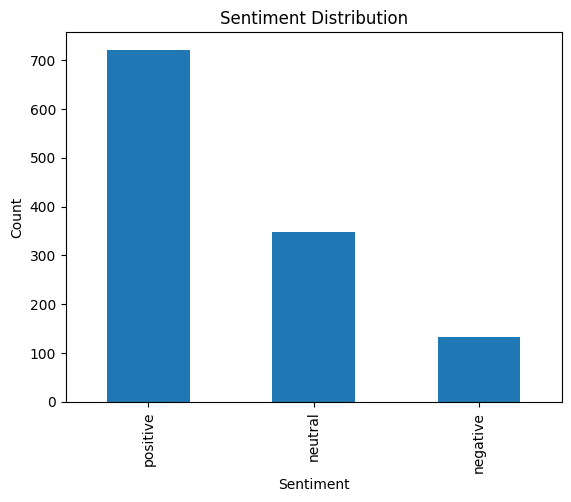

In [15]:
print(df['sentiment'].value_counts())
# display the counts
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##### It can also be seen using pie chart

In [16]:
(df[df['sentiment'] == 'positive'].shape[0])

721

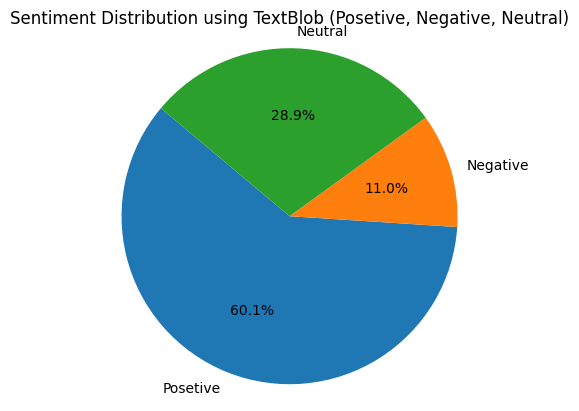

In [17]:
posetive_count = df[df['sentiment'] == 'positive'].shape[0]
negative_count = df[df['sentiment'] == 'negative'].shape[0]
neutral_count = df[df['sentiment'] == 'neutral'].shape[0]

labels = ['Posetive', 'Negative', 'Neutral']
sizes = [posetive_count, negative_count, neutral_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution using TextBlob (Posetive, Negative, Neutral)')
plt.show()

#### Sentiment Analysis using VADER

Description: VADER is tailored for short texts like reviews, accounting for sentiment intensity and informal language

In [18]:
from sentiment_analysis import get_sentiment_vader

In [19]:
sia = SentimentIntensityAnalyzer()
df['vade_sentiment_list'] = df['processed_review'].apply(lambda x : get_sentiment_vader(x, sia))
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}"
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}"
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}"
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}"
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}"


In [20]:
## Apply Vader sentiment analysis
df['vader_sentiment'] = [df['vade_sentiment_list'][i]['label'] for i in range(len(df['vade_sentiment_list']))]
df['vader_sentiment_score'] = [df['vade_sentiment_list'][i]['score'] for i in range(len(df['vade_sentiment_list']))]
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list,vader_sentiment,vader_sentiment_score
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404


In [21]:
#Display sentiment distribution using Vader
print(df['vader_sentiment'].value_counts())

vader_sentiment
positive    745
neutral     309
negative    146
Name: count, dtype: int64


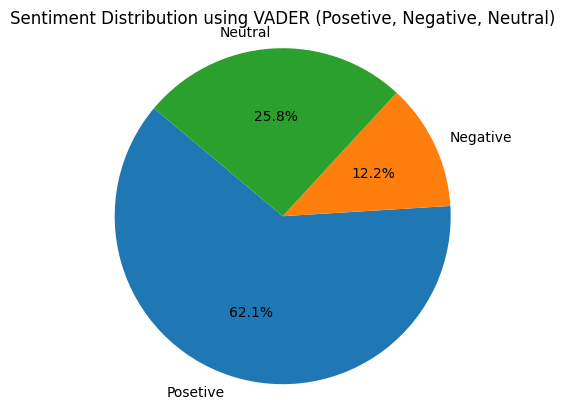

In [22]:
posetive_count = df[df['vader_sentiment'] == 'positive'].shape[0]
negative_count = df[df['vader_sentiment'] == 'negative'].shape[0]
neutral_count = df[df['vader_sentiment'] == 'neutral'].shape[0]

labels = ['Posetive', 'Negative', 'Neutral']
sizes = [posetive_count, negative_count, neutral_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution using VADER (Posetive, Negative, Neutral)')
plt.show()

#### Sentiment Analysis Using distilbert-base-uncased-finetuned-sst-2-english

In [23]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sentiment_analysis import is_amharic, classify_sentiments_with_label_neutral

model_am = "rasyosef/bert-medium-amharic-finetuned-sentiment"
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(model_name)

bert_sentiment = pipeline("text-classification", model=model_am)

classifier = pipeline("sentiment-analysis", model=model_name, tokenizer=tokenizer)

c:\Users\Tegbabu\customer-experience-analytics-fintech\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
Device set to use cpu


In [24]:
text_list = df['processed_review'].tolist()

df['sentiment_result'] = classify_sentiments_with_label_neutral(text_list, bert_sentiment, classifier)


In [25]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list,vader_sentiment,vader_sentiment_score,sentiment_result
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9883}"
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9636}"
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}"
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9804}"
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}"


In [26]:
df['sentiment_hf'] = df['sentiment_result'].apply(lambda x: x['label'])
df['sentiment_hf_score'] = df['sentiment_result'].apply(lambda x: x['score'])

In [27]:
df[df['sentiment_hf'] == 'negative']

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list,vader_sentiment,vader_sentiment_score,sentiment_result,sentiment_hf,sentiment_hf_score
6,One of the poorest app for 2 main reasons 1-wo...,1,2024-06-15,Commercial Bank of Ethiopia,Google Play,one poorest app 2 main reason internet connect...,"{'label': 'positive', 'score': 0.2222222222222...",positive,0.222222,"{'label': 'negative', 'score': -0.3818}",negative,-0.3818,"{'label': 'negative', 'score': 0.9998}",negative,0.9998
9,Trashy app😒😒😒,1,2023-10-18,Commercial Bank of Ethiopia,Google Play,trashy,"{'label': 'neutral', 'score': 0.0}",neutral,0.000000,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.9933}",negative,0.9933
14,"The limited transaction listing, only to recen...",1,2023-02-17,Commercial Bank of Ethiopia,Google Play,limited transaction listing recent list make a...,"{'label': 'negative', 'score': -0.047619047619...",negative,-0.047619,"{'label': 'negative', 'score': -0.0258}",negative,-0.0258,"{'label': 'negative', 'score': 0.9969}",negative,0.9969
17,ያስቸግራል,4,2025-02-15,Commercial Bank of Ethiopia,Google Play,ያስቸግራል,"{'label': 'neutral', 'score': 0.0}",neutral,0.000000,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.9466}",negative,0.9466
18,Asitemamagn yebank agar,5,2024-05-08,Commercial Bank of Ethiopia,Google Play,asitemamagn yebank agar,"{'label': 'neutral', 'score': 0.0}",neutral,0.000000,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.8478}",negative,0.8478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,This app is not working unless you turn off de...,2,2025-04-04,Dashen Bank of Ethiopia,Google Play,app working unless turn developer mode phone t...,"{'label': 'positive', 'score': 0.2857142857142...",positive,0.285714,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.9898}",negative,0.9898
1180,waw,5,2025-04-28,Dashen Bank of Ethiopia,Google Play,waw,"{'label': 'neutral', 'score': 0.0}",neutral,0.000000,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.7346}",negative,0.7346
1182,Its good app than other compitators but it con...,3,2025-05-18,Dashen Bank of Ethiopia,Google Play,good app compitators confuse transfer need otp...,"{'label': 'positive', 'score': 0.7}",positive,0.700000,"{'label': 'positive', 'score': 0.5106}",positive,0.5106,"{'label': 'negative', 'score': 0.7499}",negative,0.7499
1190,tanku,5,2025-04-04,Dashen Bank of Ethiopia,Google Play,tanku,"{'label': 'neutral', 'score': 0.0}",neutral,0.000000,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'negative', 'score': 0.916}",negative,0.9160


In [28]:
#Display sentiment distribution using distilbert
print(df['sentiment_hf'].value_counts())

sentiment_hf
positive    826
negative    374
Name: count, dtype: int64


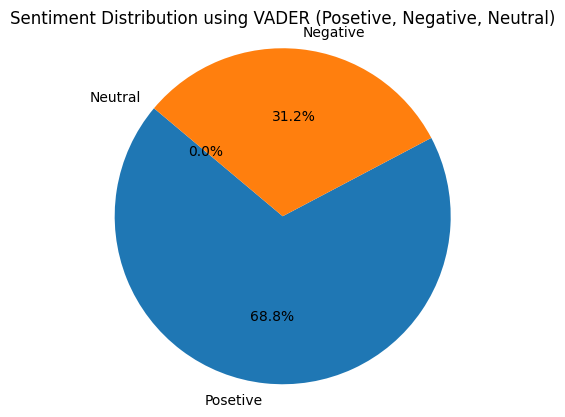

In [29]:
posetive_count = df[df['sentiment_hf'] == 'positive'].shape[0]
negative_count = df[df['sentiment_hf'] == 'negative'].shape[0]
neutral_count = df[df['sentiment_hf'] == 'neutral'].shape[0]

labels = ['Posetive', 'Negative', 'Neutral']
sizes = [posetive_count, negative_count, neutral_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution using VADER (Posetive, Negative, Neutral)')
plt.show()

#### Keyword Extraction with TF-IDF

In [30]:
vectorizer = TfidfVectorizer(max_features=100)

X = vectorizer.fit_transform(df['processed_review'])

#Get the top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords: ", keywords)

Top Keywords:  ['able' 'account' 'ahead' 'also' 'always' 'amazing' 'app' 'application'
 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'boa' 'ca' 'cbe'
 'convenient' 'crash' 'customer' 'dashen' 'day' 'developer' 'digital'
 'easy' 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'experience'
 'fast' 'feature' 'fix' 'friendly' 'get' 'give' 'good' 'great' 'help'
 'issue' 'keep' 'life' 'like' 'love' 'make' 'many' 'mobile' 'money' 'much'
 'need' 'network' 'never' 'new' 'nice' 'ok' 'one' 'open' 'option' 'otp'
 'payment' 'phone' 'please' 'previous' 'properly' 'really' 'reliable'
 'say' 'seamless' 'secure' 'security' 'service' 'simple' 'slow' 'smooth'
 'step' 'super' 'system' 'telebirr' 'thank' 'thanks' 'time' 'transaction'
 'transfer' 'try' 'update' 'use' 'used' 'user' 'using' 'version' 'well'
 'work' 'working' 'worst' 'would' 'wow' 'በጣም' 'ነው']


### Combining Sentiment Analysis and keyword extraction

In [31]:
positive_reviews_textblob = df[df['sentiment'] == 'positive']['processed_review']
negative_reviews_textblob = df[df['sentiment'] == 'negative']['processed_review']
neutral_reviews_textblob  = df[df['sentiment'] == 'neutral']['processed_review']

In [32]:
positive_reviews_vader = df[df['vader_sentiment'] == 'positive']['processed_review']
negative_reviews_vader = df[df['vader_sentiment'] == 'negative']['processed_review']
neutral_reviews_vader  = df[df['vader_sentiment'] == 'neutral']['processed_review']

In [33]:
positive_reviews_transformer = df[df['sentiment_hf'] == 'positive']['processed_review']
negative_reviews_transformer = df[df['sentiment_hf'] == 'negative']['processed_review']

In [34]:
# Extract keywords from posetive review for TextBlob
vectorizer_pos = TfidfVectorizer(max_features=100)
X_pos = vectorizer_pos.fit_transform(positive_reviews_textblob)
print("Top keywords in Posetive Review Textblob: ", vectorizer_pos.get_feature_names_out())
# Extract keywords from negative review
vectorizer_neg = TfidfVectorizer(max_features=100)
X_neg = vectorizer_neg.fit_transform(negative_reviews_textblob)
print("\nTop keywords in Negative Review Textblob: ", vectorizer_neg.get_feature_names_out())
# Extract keywords from neutral review
vectorizer_neu = TfidfVectorizer(max_features=100)
X_neu = vectorizer_neu.fit_transform(neutral_reviews_textblob)
print("\nTop keywords in Neutral Review Textblob: ", vectorizer_neu.get_feature_names_out())

Top keywords in Posetive Review Textblob:  ['able' 'access' 'account' 'ahead' 'also' 'always' 'amazing' 'app'
 'application' 'apps' 'available' 'balance' 'bank' 'banking' 'best'
 'better' 'bill' 'boa' 'ca' 'cbe' 'chat' 'convenient' 'customer' 'dashen'
 'day' 'design' 'developer' 'digital' 'easily' 'easy' 'error' 'ethiopia'
 'even' 'ever' 'everything' 'excellent' 'experience' 'fast' 'feature'
 'financial' 'first' 'fix' 'friendly' 'give' 'good' 'great' 'help'
 'highly' 'interface' 'issue' 'job' 'keep' 'life' 'like' 'love' 'make'
 'many' 'mobile' 'money' 'much' 'need' 'new' 'nice' 'ok' 'one' 'option'
 'otp' 'payment' 'place' 'platform' 'please' 'really' 'reliable' 'safe'
 'say' 'seamless' 'secure' 'security' 'service' 'simple' 'smart' 'smooth'
 'step' 'super' 'supper' 'telebirr' 'thank' 'thanks' 'time' 'transaction'
 'transfer' 'update' 'use' 'user' 'using' 'version' 'well' 'work'
 'working' 'wow']

Top keywords in Negative Review Textblob:  ['abyssinia' 'access' 'account' 'allow' 'always

In [35]:
# Extract keywords from posetive review for VADER
vectorizer_pos = TfidfVectorizer(max_features=100)
X_pos = vectorizer_pos.fit_transform(positive_reviews_vader)
print("\nTop keywords in Posetive Review VADER: ", vectorizer_pos.get_feature_names_out())
# Extract keywords from negative review
vectorizer_neg = TfidfVectorizer(max_features=100)
X_neg = vectorizer_neg.fit_transform(negative_reviews_vader)
print("\nTop keywords in Negative Review VADER: ", vectorizer_neg.get_feature_names_out())
# Extract keywords from neutral review
vectorizer_neu = TfidfVectorizer(max_features=100)
X_neu = vectorizer_neu.fit_transform(neutral_reviews_vader)
print("Top keywords in Neutral Review VADER: ", vectorizer_neu.get_feature_names_out())


Top keywords in Posetive Review VADER:  ['able' 'account' 'ahead' 'also' 'always' 'amazing' 'app' 'application'
 'apps' 'bank' 'banking' 'best' 'better' 'bill' 'boa' 'ca' 'cbe' 'chat'
 'convenient' 'customer' 'dashen' 'day' 'design' 'digital' 'easily' 'easy'
 'ethiopia' 'even' 'ever' 'everything' 'excellent' 'experience' 'fast'
 'feature' 'financial' 'fix' 'friendly' 'give' 'good' 'great' 'help'
 'highly' 'interface' 'intuitive' 'issue' 'job' 'keep' 'life' 'like'
 'love' 'make' 'making' 'many' 'mobile' 'money' 'much' 'need' 'never'
 'new' 'nice' 'ok' 'one' 'open' 'option' 'otp' 'payment' 'phone' 'place'
 'platform' 'please' 'previous' 'really' 'reliable' 'seamless' 'secure'
 'security' 'service' 'simple' 'smooth' 'speed' 'step' 'super' 'supper'
 'thank' 'thanks' 'time' 'transaction' 'transfer' 'truly' 'try' 'update'
 'use' 'user' 'using' 'version' 'well' 'work' 'working' 'would' 'wow']

Top keywords in Negative Review VADER:  ['abyssinia' 'access' 'account' 'always' 'annoying' 'app' '

In [36]:
# Extract keywords from posetive review for VADER
vectorizer_pos = TfidfVectorizer(max_features=100)
X_pos = vectorizer_pos.fit_transform(positive_reviews_transformer)
print("Top keywords in Posetive Review Transformer: ", vectorizer_pos.get_feature_names_out())
# Extract keywords from negative review
vectorizer_neg = TfidfVectorizer(max_features=100)
X_neg = vectorizer_neg.fit_transform(negative_reviews_transformer)
print("\nTop keywords in Negative Review Transformer: ", vectorizer_neg.get_feature_names_out())

Top keywords in Posetive Review Transformer:  ['able' 'account' 'ahead' 'also' 'always' 'amazing' 'app' 'application'
 'apps' 'awesome' 'bank' 'banking' 'best' 'better' 'bill' 'boa' 'ca' 'cbe'
 'chat' 'convenient' 'customer' 'dashen' 'day' 'design' 'digital' 'done'
 'easy' 'ethiopia' 'ethiopian' 'even' 'ever' 'everyday' 'everything'
 'excellent' 'experience' 'fantastic' 'fast' 'feature' 'financial' 'first'
 'friendly' 'give' 'good' 'great' 'help' 'highly' 'incredibly' 'interface'
 'intuitive' 'job' 'keep' 'life' 'like' 'love' 'make' 'making' 'many'
 'mobile' 'money' 'much' 'need' 'new' 'nice' 'ok' 'one' 'payment' 'place'
 'platform' 'please' 'really' 'recommended' 'reliable' 'seamless' 'secure'
 'security' 'service' 'simple' 'smart' 'smooth' 'step' 'super' 'supper'
 'thank' 'thanks' 'time' 'transaction' 'transfer' 'truly' 'update' 'use'
 'useful' 'user' 'using' 'version' 'well' 'work' 'working' 'wow' 'በጣም'
 'ነው']

Top keywords in Negative Review Transformer:  ['able' 'abyssinia' 'acces

#### Visualization of the Results

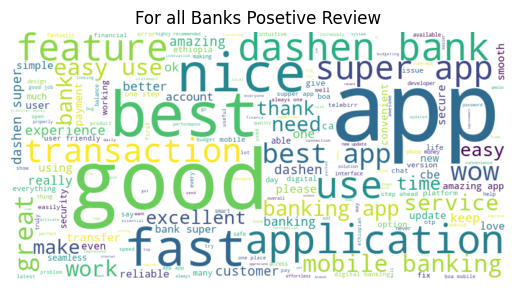

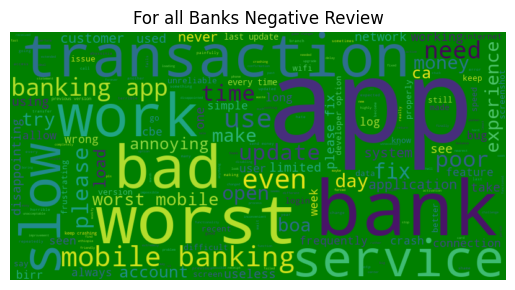

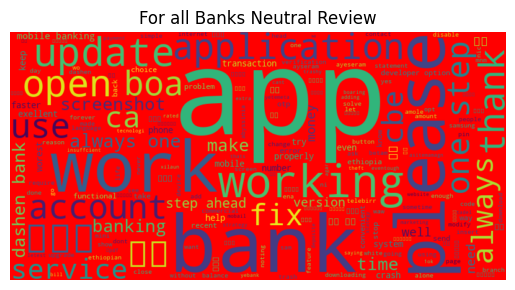

In [37]:
posetive_review_text = ' '.join(positive_reviews_textblob)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(posetive_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Posetive Review')
plt.show()
negative_review_text = ' '.join(negative_reviews_textblob)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(negative_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Negative Review')
plt.show()
neutral_review_text = ' '.join(neutral_reviews_textblob)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(neutral_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Neutral Review') 
plt.show()

##### VADER

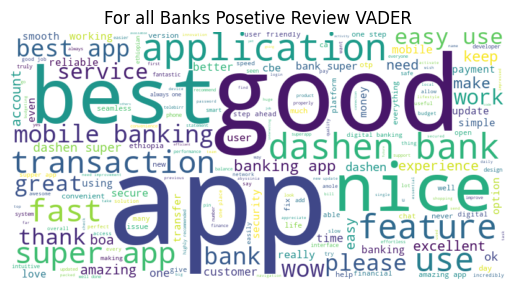

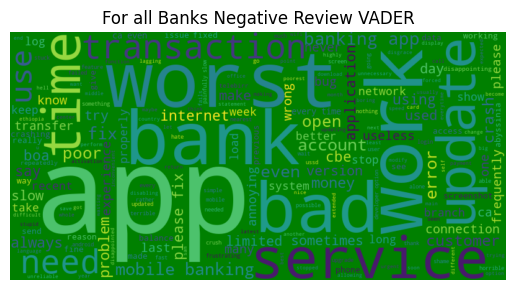

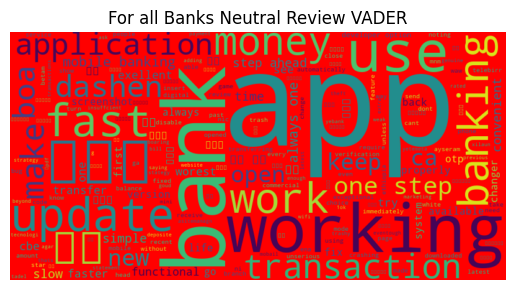

In [38]:
posetive_review_text = ' '.join(positive_reviews_vader)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(posetive_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Posetive Review VADER')
plt.show()
negative_review_text = ' '.join(negative_reviews_vader)
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(negative_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Negative Review VADER')
plt.show()
neutral_review_text = ' '.join(neutral_reviews_vader)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(neutral_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Neutral Review VADER') 
plt.show()

#### Transformer Based

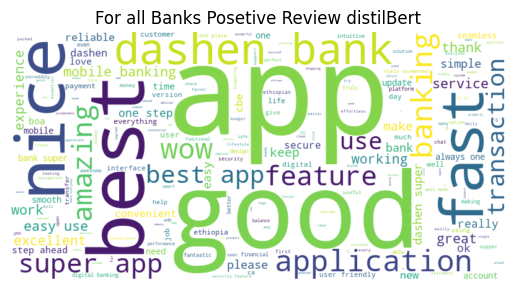

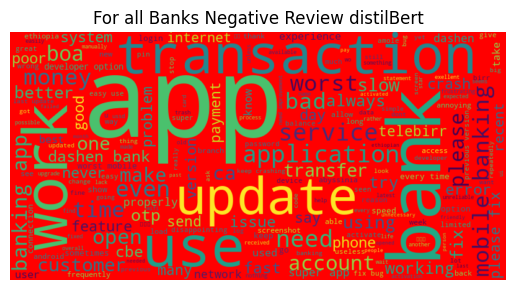

In [39]:
posetive_review_text = ' '.join(positive_reviews_transformer)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(posetive_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Posetive Review distilBert')
plt.show()
negative_review_text = ' '.join(negative_reviews_transformer)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('For all Banks Negative Review distilBert')
plt.show()

### Aggregate by bank and rating

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_text            1200 non-null   object 
 1   rating                 1200 non-null   int64  
 2   date                   1200 non-null   object 
 3   bank_name              1200 non-null   object 
 4   source                 1200 non-null   object 
 5   processed_review       1200 non-null   object 
 6   sentiment_list         1200 non-null   object 
 7   sentiment              1200 non-null   object 
 8   sentiment_score        1200 non-null   float64
 9   vade_sentiment_list    1200 non-null   object 
 10  vader_sentiment        1200 non-null   object 
 11  vader_sentiment_score  1200 non-null   float64
 12  sentiment_result       1200 non-null   object 
 13  sentiment_hf           1200 non-null   object 
 14  sentiment_hf_score     1200 non-null   float64
dtypes: f

In [41]:
df_aggregate = df.groupby(["bank_name", "rating"])['sentiment_score'].mean().reset_index()
df_aggregate.rename(columns={'sentiment_score': 'mean_sentiment_score'}, inplace=True)
df_aggregate.sort_values(by='mean_sentiment_score',  inplace=True)
df_aggregate.head()

,bank_name,rating,mean_sentiment_score
0,Bank of Absynia Ethiopia,1,-0.103967
5,Commercial Bank of Ethiopia,1,-0.103252
1,Bank of Absynia Ethiopia,2,-0.036438
11,Dashen Bank of Ethiopia,2,-0.009178
10,Dashen Bank of Ethiopia,1,0.063466


In [42]:
import seaborn as sns

#### Meansentiment score based on textblob score

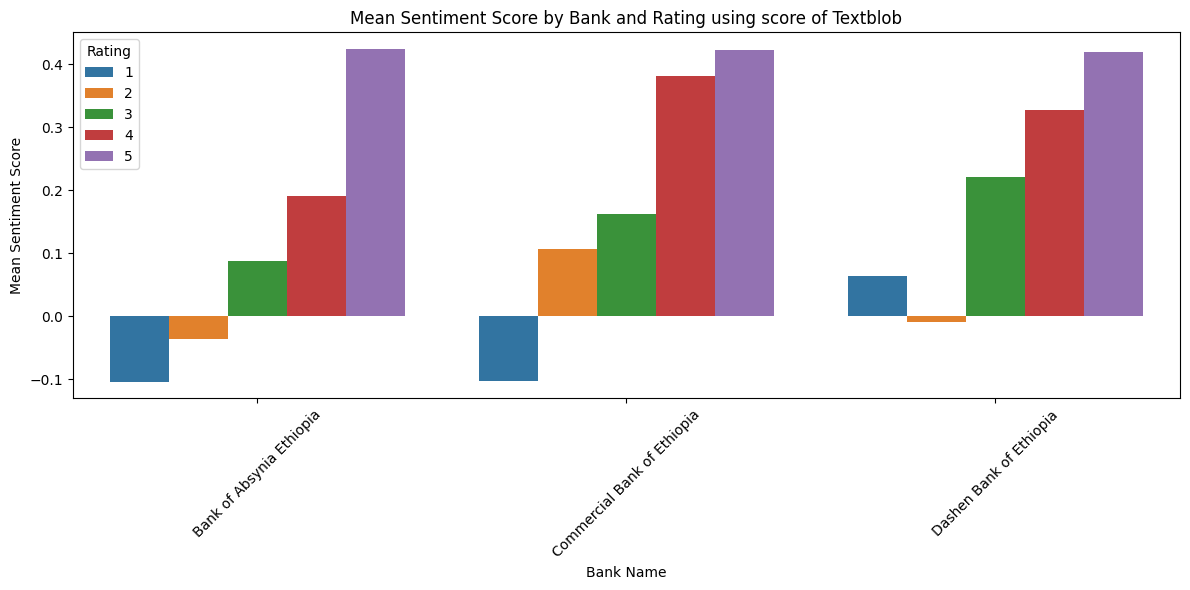

In [43]:
df_aggregate['rating'] = df_aggregate['rating'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df_aggregate['date'] = df['date'].dt.date
plt.figure(figsize=(12, 6))
sns.barplot(data=df_aggregate, x='bank_name', y='mean_sentiment_score', hue='rating')
plt.title('Mean Sentiment Score by Bank and Rating using score of Textblob')
plt.xlabel('Bank Name')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

#### Mean Sentiment score based on VADER model

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   review_text            1200 non-null   object        
 1   rating                 1200 non-null   int64         
 2   date                   1200 non-null   datetime64[ns]
 3   bank_name              1200 non-null   object        
 4   source                 1200 non-null   object        
 5   processed_review       1200 non-null   object        
 6   sentiment_list         1200 non-null   object        
 7   sentiment              1200 non-null   object        
 8   sentiment_score        1200 non-null   float64       
 9   vade_sentiment_list    1200 non-null   object        
 10  vader_sentiment        1200 non-null   object        
 11  vader_sentiment_score  1200 non-null   float64       
 12  sentiment_result       1200 non-null   object        
 13  sen

In [45]:
df_aggregate_vad = df.groupby(["bank_name", "rating"])['vader_sentiment_score'].mean().reset_index()
df_aggregate_vad.rename(columns={'vader_sentiment_score': 'mean_sentiment_score'}, inplace=True)
df_aggregate_vad.sort_values(by='mean_sentiment_score',  inplace=True)
df_aggregate_vad.head()

,bank_name,rating,mean_sentiment_score
0,Bank of Absynia Ethiopia,1,-0.136023
5,Commercial Bank of Ethiopia,1,-0.110273
6,Commercial Bank of Ethiopia,2,0.012867
11,Dashen Bank of Ethiopia,2,0.034200
10,Dashen Bank of Ethiopia,1,0.055257


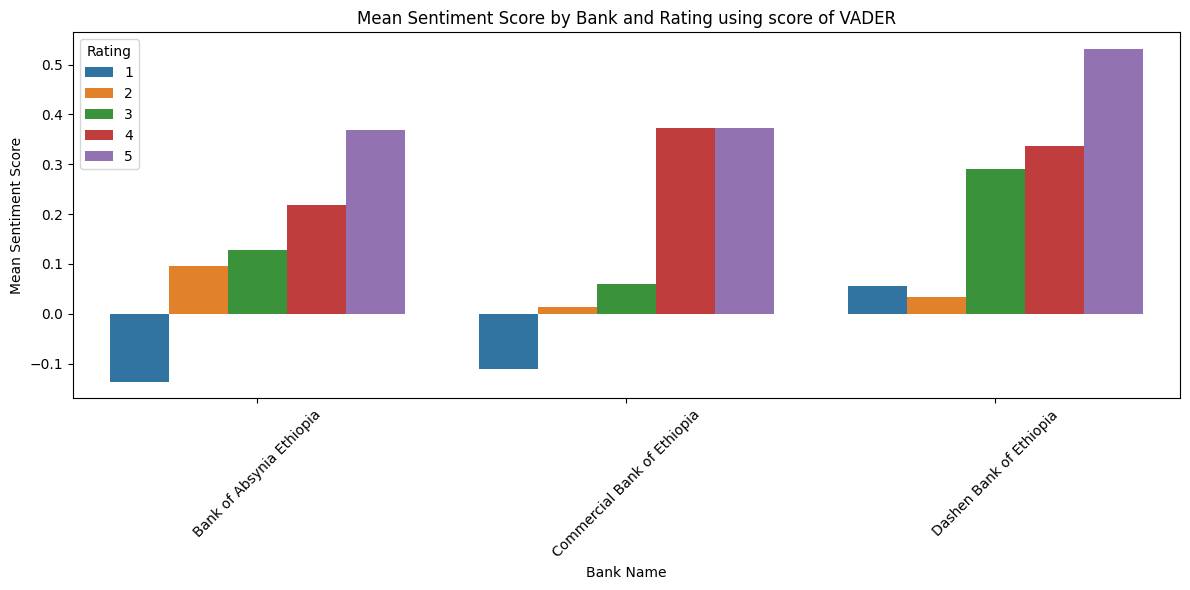

In [46]:
df_aggregate_vad['rating'] = df_aggregate_vad['rating'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df_aggregate_vad['date'] = df['date'].dt.date
plt.figure(figsize=(12, 6))
sns.barplot(data=df_aggregate_vad, x='bank_name', y='mean_sentiment_score', hue='rating')
plt.title('Mean Sentiment Score by Bank and Rating using score of VADER')
plt.xlabel('Bank Name')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

#### Mean Sentiment score based on distelbert model

In [47]:
df_aggregate_distber = df.groupby(["bank_name", "rating"])['sentiment_hf_score'].mean().reset_index()
df_aggregate_distber.rename(columns={'sentiment_hf_score': 'mean_sentiment_score'}, inplace=True)
df_aggregate_distber.sort_values(by='mean_sentiment_score',  inplace=True)
df_aggregate_distber.head()

,bank_name,rating,mean_sentiment_score
12,Dashen Bank of Ethiopia,3,0.927690
6,Commercial Bank of Ethiopia,2,0.934233
3,Bank of Absynia Ethiopia,4,0.943150
1,Bank of Absynia Ethiopia,2,0.944588
13,Dashen Bank of Ethiopia,4,0.951777


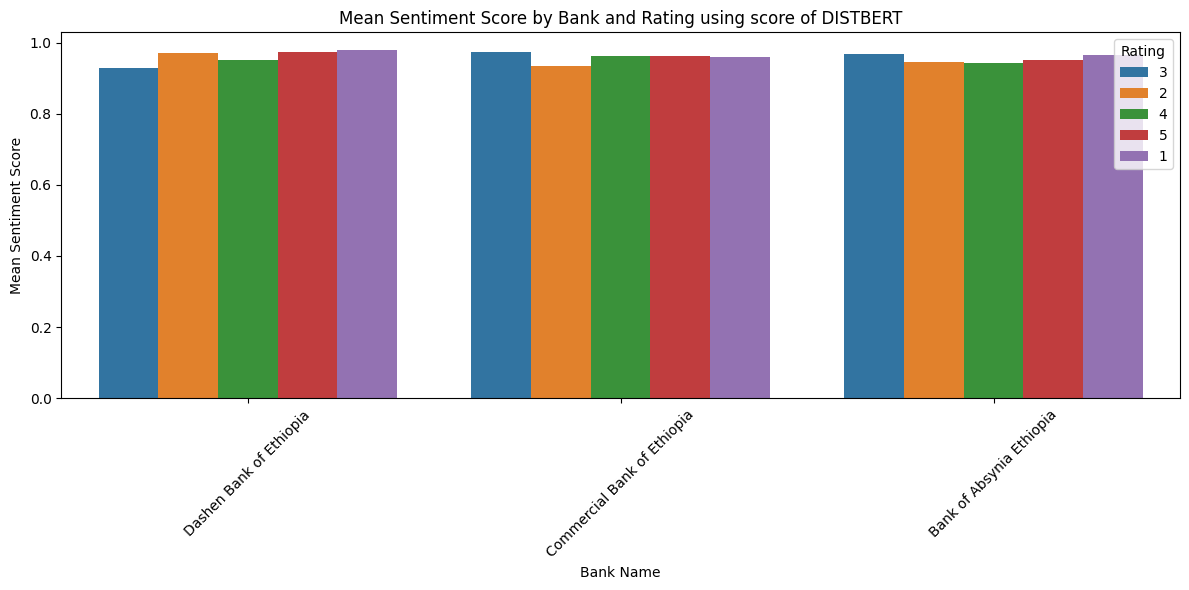

In [48]:
df_aggregate_distber['rating'] = df_aggregate_distber['rating'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df_aggregate_distber['date'] = df['date'].dt.date
plt.figure(figsize=(12, 6))
sns.barplot(data=df_aggregate_distber, x='bank_name', y='mean_sentiment_score', hue='rating')
plt.title('Mean Sentiment Score by Bank and Rating using score of DISTBERT')
plt.xlabel('Bank Name')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

In [49]:

keyword_themes_map = {
    "login": "Account Access Issues",
    "transfer": "Transaction Performance",
    "delay": "Transaction Delays",
    "slow": "Transaction Performance",
    "customer care": "Customer Service",
    "app design": "User experience",
    "app functionality": "User experience",
    "help": "Customer Service",
    "support": "Customer Support",
    "interface": "User experience",
    "interface design": "User experience",
    "usability": "User experience",
    "easy": "User experience",
    "difficult": "User experience",
    "password": "Account Access Issues",
    "security": "Account Access Issues",

}

In [51]:
from sentiment_analysis import map_keywords_to_themes

In [ ]:
def get_top_keywords(vect, feature, top_n):
    row_array = vect.toarray().flatten()
    top_indices = row_array.argsort()[-top_n:][::-1]
    return [feature[i] for i in top_indices if row_array[i] > 0]

In [53]:
# Extract keywords from posetive review for VADER
vectorizer_pos = TfidfVectorizer(max_features=1000)
X_pos = vectorizer_pos.fit_transform(df['processed_review'])
feature_names = vectorizer_pos.get_feature_names_out()

df['keywords'] = [get_top_keywords(X_pos[i], feature_names, 50) for i in range(X_pos.shape[0])]

In [54]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list,vader_sentiment,vader_sentiment_score,sentiment_result,sentiment_hf,sentiment_hf_score,keywords
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9883}",positive,0.9883,[ጥሩ]
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9636}",positive,0.9636,"[ቆንጆ, ነው]"
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}",positive,0.9998,"[good, app]"
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9804}",positive,0.9804,"[አሪፍ, አፕ, በጣም, ነው]"
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}",positive,0.9998,[good]


In [57]:
def map_keywords_to_themes(keywords: list, themes_map: dict) -> list:
    """
    Map keywords to themes based on a predefined mapping.

    Args:
        keywords (list): List of keywords to map.
        themes_map (dict): Dictionary mapping keywords to themes.

    Returns:
        list: List of themes corresponding to the keywords.
    """
    mapped_themes = []
    for keyword in keywords:
        theme = themes_map.get(keyword, 'Other')
        mapped_themes.append(theme)
    return mapped_themes


In [58]:
df['themes'] = df['keywords'].apply(lambda x: map_keywords_to_themes(x, keyword_themes_map))

In [59]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment_list,sentiment,sentiment_score,vade_sentiment_list,vader_sentiment,vader_sentiment_score,sentiment_result,sentiment_hf,sentiment_hf_score,keywords,themes
0,ጥሩ,5,2025-01-02,Commercial Bank of Ethiopia,Google Play,ጥሩ,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9883}",positive,0.9883,[ጥሩ],[Other]
1,ቆንጆ ነው,5,2025-03-31,Commercial Bank of Ethiopia,Google Play,ቆንጆ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9636}",positive,0.9636,"[ቆንጆ, ነው]","[Other, Other]"
2,good app,4,2024-12-29,Commercial Bank of Ethiopia,Google Play,good app,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}",positive,0.9998,"[good, app]","[Other, Other]"
3,በጣም አሪፍ አፕ ነው!!😘😘,5,2023-09-02,Commercial Bank of Ethiopia,Google Play,በጣም አሪፍ አፕ ነው,"{'label': 'neutral', 'score': 0.0}",neutral,0.0,"{'label': 'neutral', 'score': 0.0}",neutral,0.0000,"{'label': 'positive', 'score': 0.9804}",positive,0.9804,"[አሪፍ, አፕ, በጣም, ነው]","[Other, Other, Other, Other]"
4,Good,5,2024-09-19,Commercial Bank of Ethiopia,Google Play,good,"{'label': 'positive', 'score': 0.7}",positive,0.7,"{'label': 'positive', 'score': 0.4404}",positive,0.4404,"{'label': 'positive', 'score': 0.9998}",positive,0.9998,[good],[Other]


In [66]:
from collections import defaultdict


def get_example_by_theme(df, theme_col: str = 'themes', theme_str: str = 'processed_review', max_examples=3):
    """
    Get an example review for a specific theme.

    Args:
        df (DataFrame): The DataFrame containing reviews and themes.
        theme (str): The theme to filter by.

    Returns:
        str: An example review for the specified theme.
    """
    theme_examples = defaultdict(list)
    for index, row in df.iterrows():
        themes = row[theme_col]
        review = row[theme_str]
        for theme in themes:
            theme_examples[theme].append(review)

    return theme_examples

In [67]:
example = get_example_by_theme(df)

In [68]:
for key, value in example.items():
    print(key)
    print(value)

Other
['ጥሩ', 'ቆንጆ ነው', 'ቆንጆ ነው', 'good app', 'good app', 'በጣም አሪፍ አፕ ነው', 'በጣም አሪፍ አፕ ነው', 'በጣም አሪፍ አፕ ነው', 'በጣም አሪፍ አፕ ነው', 'good', 'best app', 'best app', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synchronization', 'one poorest app 2 main reason internet connection best internet acess usally say failed synch

In [71]:
df1 = df[['bank_name', 'processed_review','rating', 'sentiment', 'sentiment_score', 'vader_sentiment', 'vader_sentiment_score', 'sentiment_hf', 'sentiment_hf_score',  'keywords', 'themes']]

In [73]:
df1.to_csv('../data/cleaned_data/sentiment_analysis_results.csv', index=False)
print("Sentiment analysis results saved to '../data/cleaned_data/sentiment_analysis_results.csv'")

Sentiment analysis results saved to '../data/cleaned_data/sentiment_analysis_results.csv'
